In [6]:
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.tree import DecisionTreeClassifier , export_text
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.tree import export_graphviz
# from six import StringIO
# from IPython.display import Image
# import pydotplus

## Read Dataframe

In [7]:
df = pd.read_csv("../datasets/fertility2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Age                               139 non-null    int64 
 1   kidney diseases                   139 non-null    object
 2   Fasting Blood sugar               139 non-null    int64 
 3   Uri infection                     139 non-null    object
 4   exercise habit                    139 non-null    object
 5   Frequency of alcohol consumption  139 non-null    object
 6   Smoking habit                     139 non-null    object
 7   profession                        139 non-null    object
 8   #hours spent sitting per day      139 non-null    int64 
 9   Diagnosis                         139 non-null    object
dtypes: int64(3), object(7)
memory usage: 11.0+ KB


In [8]:
df.columns

Index(['Age', 'kidney diseases', 'Fasting Blood sugar', 'Uri infection',
       'exercise habit', 'Frequency of alcohol consumption', 'Smoking habit',
       'profession', '#hours spent sitting per day', 'Diagnosis'],
      dtype='object')

In [9]:
# Get every unique from each column

columns = df.columns.tolist()

for column in columns:
  unique_values = df[column].unique()
  print(f"{column} : {unique_values}")

Age : [30 35 27 44 36 29 32 33 56 28 55 48 31 53 42 38 58 40 39 34 50 54 64 60
 65 70 63 62 67 66 59 61 68 51 22 24 37]
kidney diseases : ['no' 'yes']
Fasting Blood sugar : [ 80 140  99  96 134 100  88 110  95  98  90  89 120 150 200 121 133  91
 144  94  87 155  86  79  81 130  92 180  82  85  78 160 153 145]
Uri infection : ['yes' 'no']
exercise habit : ['more than 3 months ago' 'less than 3 hours a week' 'no'
 'less than 3 months ago' 'no exercise']
Frequency of alcohol consumption : ['once a week' 'hardly ever or never' 'several times a week'
 'several times a day' 'every day']
Smoking habit : ['occasional' 'daily' 'never']
profession : ['engineer' 'pilot' 'programmer' 'accountant']
#hours spent sitting per day : [ 16   6   9   7   8   5   2  11   3 342  14  18  10   1]
Diagnosis : ['Normal' 'weak']


## Convert non numbers values to unique numeric label

In [10]:
# using One-hot encoding to creates binary columns for each columns that not numeric
# oneHotEncoding = OneHotEncoder(sparse_output=False)
# oneHotEncoding.fit(X)

# X_encoded = oneHotEncoding.transform(X)

In [11]:
df['exercise habit'].replace('no exercise', 'no',inplace=True)

In [12]:
# Using LabelEncoder
le = LabelEncoder()
for feature in df.columns :
  if df[feature].dtype == object :
    df[feature] = le.fit_transform(df[feature])

In [13]:
X = df.drop('Diagnosis', axis=1) # Features
y = df.Diagnosis # Label

## Create Decision Tree

In [14]:
def create_decision_tree(model) :
  dot_data = StringIO()

  class_names = [ str(x) for x in df.Diagnosis.unique().tolist() ]

  features = columns[:-1]

  export_graphviz(model,out_file=dot_data,
                  filled=True,rounded=True,
                  special_characters=True,feature_names = features,class_names=class_names)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('fertility.png')
  return graph.create_png()

## Train Test Split Method

In [15]:
# Split dataset into Train & Test Set
X_train , X_test, y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=12)

In [16]:
clf = DecisionTreeClassifier()

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Predict using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.7857142857142857


In [18]:
# # Use train test split to test model
# y_pred = clf.predict(X_test)
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

## Create Decision Tree with Train Test Split method

In [19]:
Image(create_decision_tree(clf))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Cross Validation Method

In [ ]:
# Using cross validation score
clf_cross = DecisionTreeClassifier(random_state=13)
scores = cross_val_score(clf_cross,X,y,cv=10)
clf_cross.fit(X,y)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy :" , scores.mean())

Cross-Validation Scores: [1.         1.         0.92857143 1.         1.         1.
 1.         1.         0.71428571 1.        ]
Mean Accuracy : 0.9642857142857142


## Create Decision Tree from Cross Validation Score

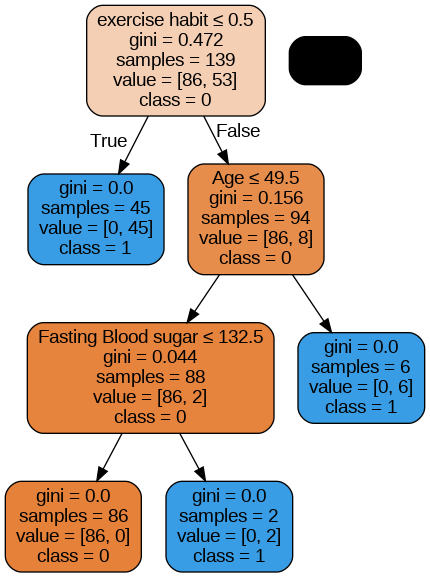

In [ ]:
Image(create_decision_tree(clf_cross))